# Flight Price Prediction


Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [392]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [393]:
df = pd.read_excel('Data_Train.xlsx')# Loading the required excel file 
df = pd.DataFrame(data = df)

In [394]:
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [395]:
df.shape #checking the shape of dataset

(10683, 11)

As we can see dataset has 10683 rows and 11 columns 

In [396]:
df.dtypes #checking the datatype for each columns


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

All the following columns are in string type and the price is in Int type

In [397]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [398]:
df.info() # getting info for each attribute of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Observation: There are missing values in Route & total_stops .


In [399]:
df.dropna(inplace = True)

In [400]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

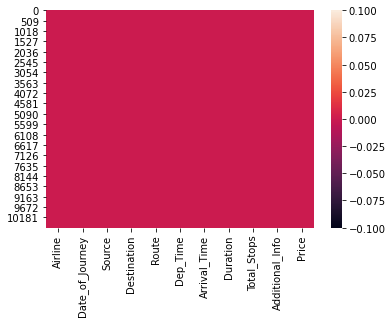

In [401]:
sns.heatmap(df.isnull())

# Now filterning the dataset to have better Prediction

In [402]:
#As we can see that Date of journey is n object data type so we should convert it into timestamp to have better result

df['Month_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month # converting the data to month of Journey format 

df['Day_Journey'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day # converting the data to doy of Journey format  

df.drop(['Date_of_Journey'], axis = 1, inplace = True) # As we have converted our dataset so now we can drop Date_of_Journey



In [403]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_Journey,Day_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In Date_of_Journey column every rows have same year so we can exclude year from our dataset

In [404]:
# Similar to Date_of_Journey we can extract values from Dep_Time to Dep_hour and Dep_minute.

df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

df.drop(["Dep_Time"], axis = 1, inplace = True)

In [405]:
# Similar to Date_of_Journey we can extract values from Arrival_Time to Arrival_hour and Arrival_min

df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [406]:
# Now making changes in duration of the plane as we know time taken by a plane to reach destination is called Duration

# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [407]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours

df["Duration_mins"] = duration_mins

df.drop(['Duration'], axis = 1, inplace = True)

In [408]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_Journey,Day_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


# EDA and Data Visulaisation

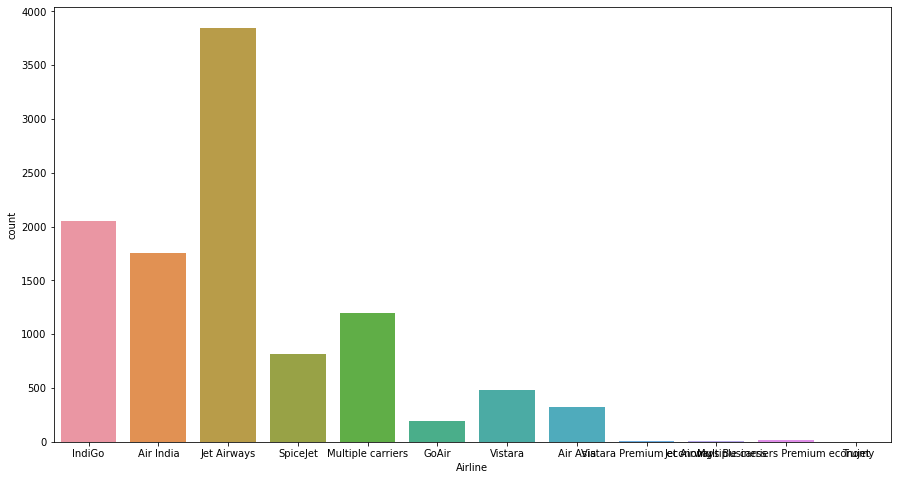

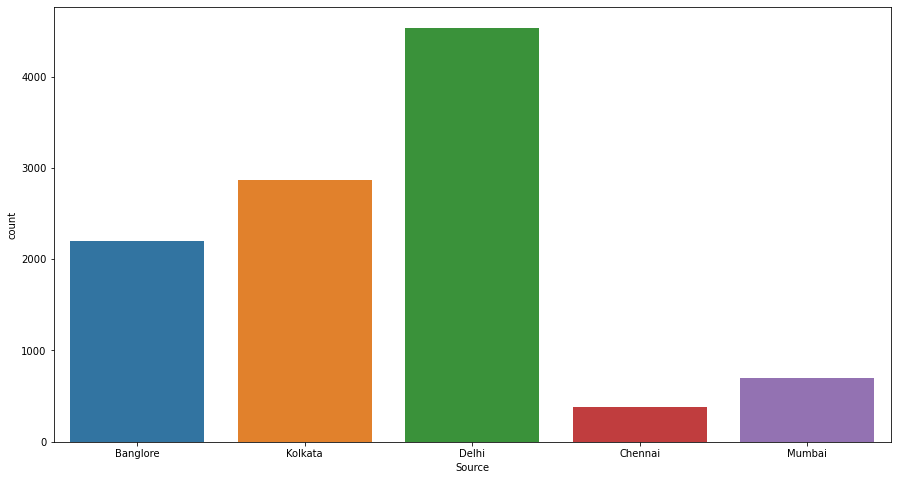

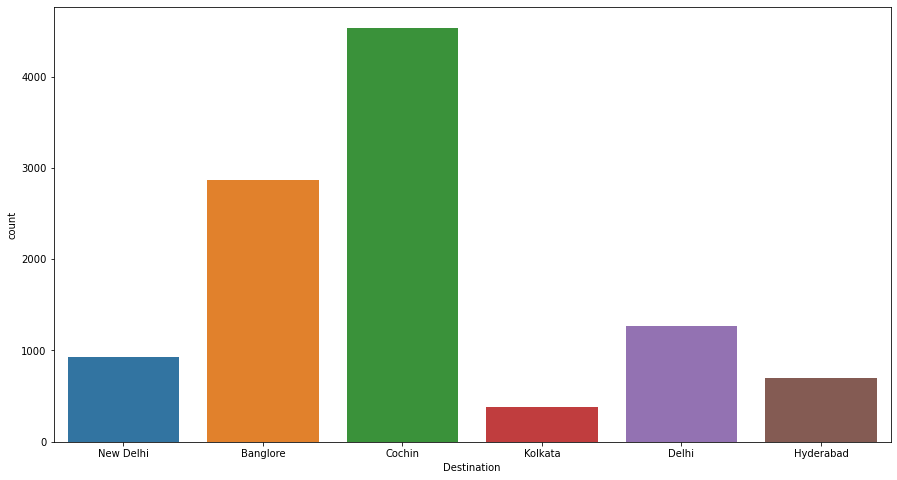

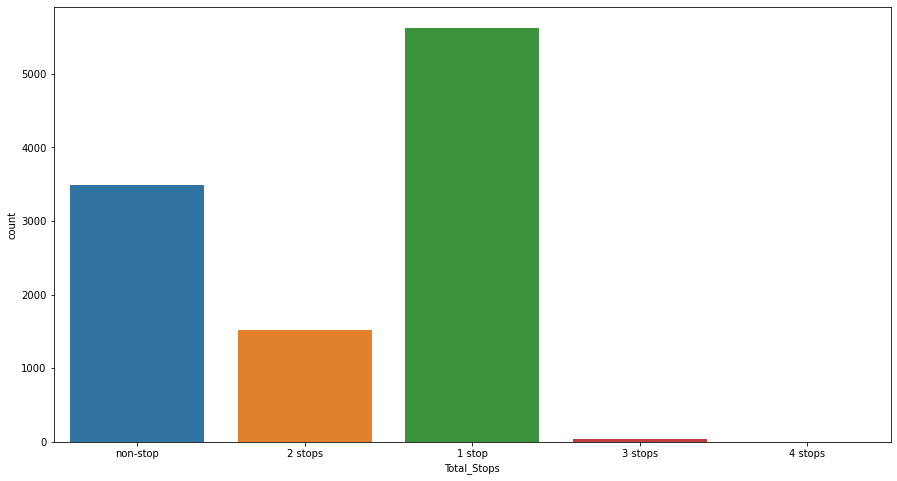

In [409]:
# plotting count bar plot for every Categorical Feature

df_cols = ['Airline','Source','Destination','Total_Stops']

for i in df_cols:
    plt.figure(figsize=(15,8))
    sns.countplot(df[i])
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

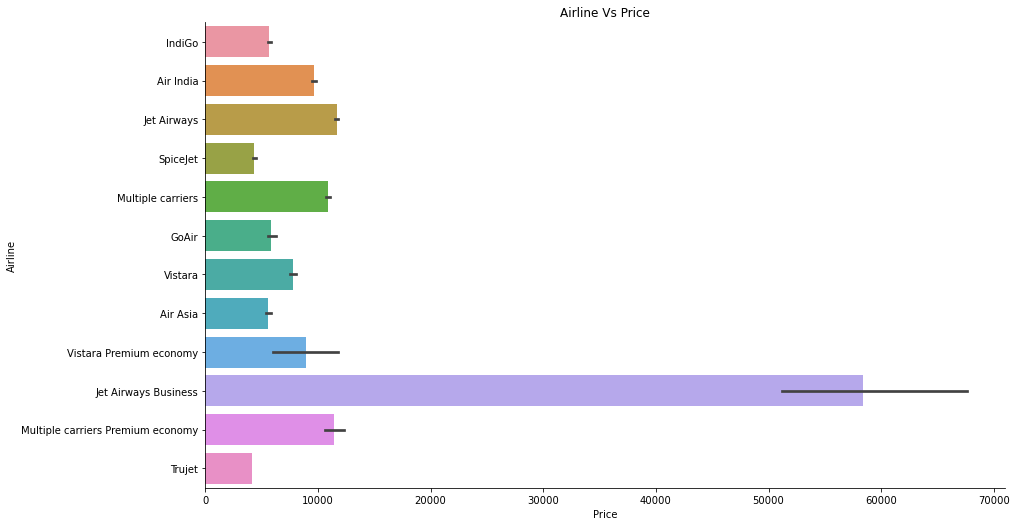

In [410]:
sns.catplot(x='Price', y='Airline', data = df, kind='bar', height= 7,aspect=2.0)
plt.title('Airline Vs Price')
plt.show

As we can see Jet Airways Business has the hight price


In [411]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [412]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [413]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

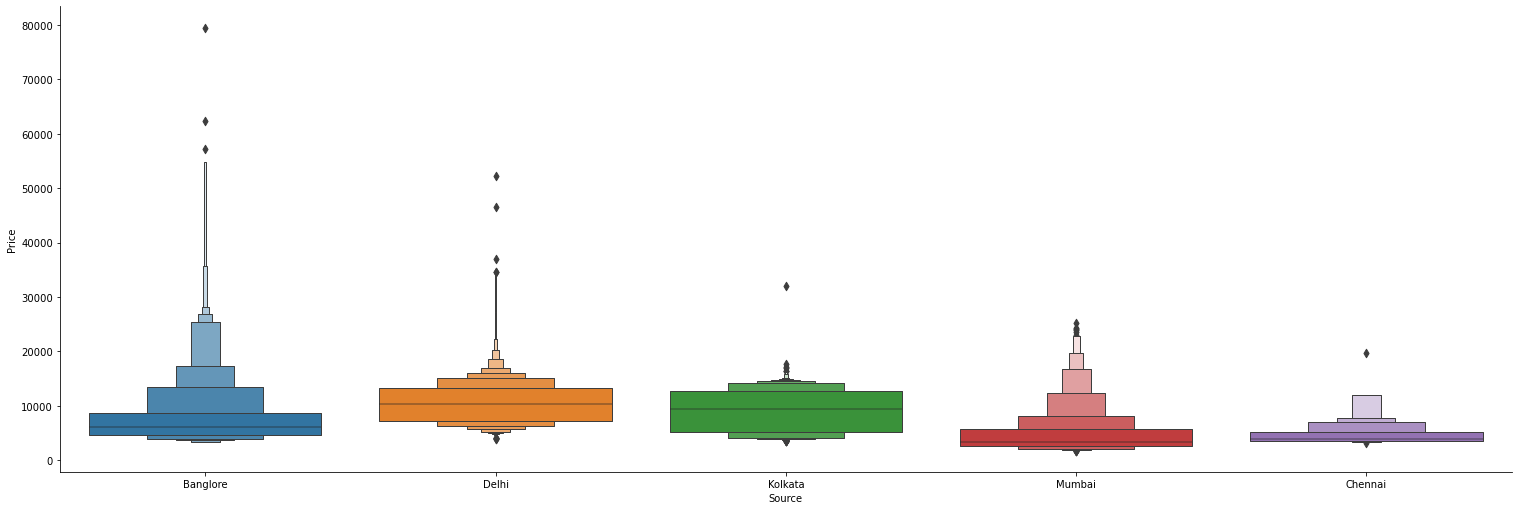

In [414]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 7, aspect = 3)
plt.show()

In [415]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [416]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [417]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[['Destination']]

Destination = pd.get_dummies(Destination,drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [418]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [419]:
df['Additional_Info']

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

In [420]:
#As to get better prediction we can drop Route column and Additional Info columns to get better prediction from our dataset

df.drop(['Route','Additional_Info'], axis=1, inplace=True)

In [421]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [422]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

In [423]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Month_Journey,Day_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [424]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

x = pd.concat([df, Airline, Source, Destination], axis = 1)

In [425]:
x.head()

,Airline,Source,Destination,Total_Stops,Price,Month_Journey,Day_Journey,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [426]:
x.drop(['Airline','Source','Destination'], axis = 1 , inplace = True)

In [427]:
x

,Total_Stops,Price,Month_Journey,Day_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,4,27,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,4,27,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,3,1,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [428]:
df_train = x

# Test Dataset

In [429]:
df1 = pd.read_excel('Test_set.xlsx')
df1 = pd.DataFrame( data=df1)

In [430]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [431]:
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [432]:
df1.shape

(2671, 10)

In [433]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [434]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [435]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No num values present in dataset

In [436]:
#As we can see that Date of journey is object data type so we should convert it into timestamp to have better result

df1['Month_Journey'] = pd.to_datetime(df1['Date_of_Journey'], format='%d/%m/%Y').dt.month # converting the data to month of Journey format 

df1['Day_Journey'] = pd.to_datetime(df1.Date_of_Journey, format='%d/%m/%Y').dt.day # converting the data to doy of Journey format  

df1.drop(['Date_of_Journey'], axis = 1, inplace = True) # As we have converted our dataset so now we can drop Date_of_Journey




In [437]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month_Journey,Day_Journey
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,5,21
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,6,24


In [438]:
# Similar to Date_of_Journey we can extract values from Dep_Time to Dep_hour and Dep_minute.

df1["Dep_hour"] = pd.to_datetime(df1["Dep_Time"]).dt.hour

df1["Dep_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute

df1.drop(["Dep_Time"], axis = 1, inplace = True)

In [439]:
df1.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Month_Journey,Day_Journey,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,5,12,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,5,21,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,5,21,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,6,24,23,55


In [440]:
# Similar to Date_of_Journey we can extract values from Arrival_Time to Arrival_hour and Arrival_min

df1["Arrival_hour"] = pd.to_datetime(df1.Arrival_Time).dt.hour

df1["Arrival_min"] = pd.to_datetime(df1.Arrival_Time).dt.minute

df1.drop(["Arrival_Time"], axis = 1, inplace = True)

In [441]:
df1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Month_Journey,Day_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,6,24,23,55,2,45


In [442]:
# Assigning and converting Duration column into list
duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [443]:
# Adding duration_hours and duration_mins list to train_data dataframe

df1["Duration_hours"] = duration_hours

df1["Duration_mins"] = duration_mins

df1.drop(['Duration'], axis = 1, inplace = True)

In [444]:
df1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_Journey,Day_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,23,55,2,45,2,50


In [445]:
df1["Source"].value_counts()
Source = pd.get_dummies(df1["Source"], drop_first= True)

In [446]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [447]:
df1["Destination"].value_counts()
Destination = pd.get_dummies(df1["Destination"], drop_first = True)

Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [448]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df1.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [449]:
# Replacing Total_Stops
df1.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [450]:
# Concatenate dataframe df1, Airline, Source, Destination
df1 = pd.concat([df1, Airline, Source, Destination], axis = 1)

In [451]:
df1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [452]:
df1.head()

,Total_Stops,Month_Journey,Day_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,5.0,12.0,6.0,20.0,10.0,20.0,4.0,0.0,1,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,5.0,21.0,19.0,15.0,19.0,0.0,23.0,45.0,0,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,5.0,21.0,8.0,0.0,21.0,0.0,13.0,0.0,0,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,6.0,24.0,23.0,55.0,2.0,45.0,2.0,50.0,0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Feature Selection

In [453]:
df_train.shape

(10682, 30)

In [454]:
df_train.columns

Index(['Total_Stops', 'Price', 'Month_Journey', 'Day_Journey', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [455]:
x = df_train.loc[:,['Total_Stops', 'Month_Journey', 'Day_Journey', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Month_Journey,Day_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3,24,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [456]:
y = df_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

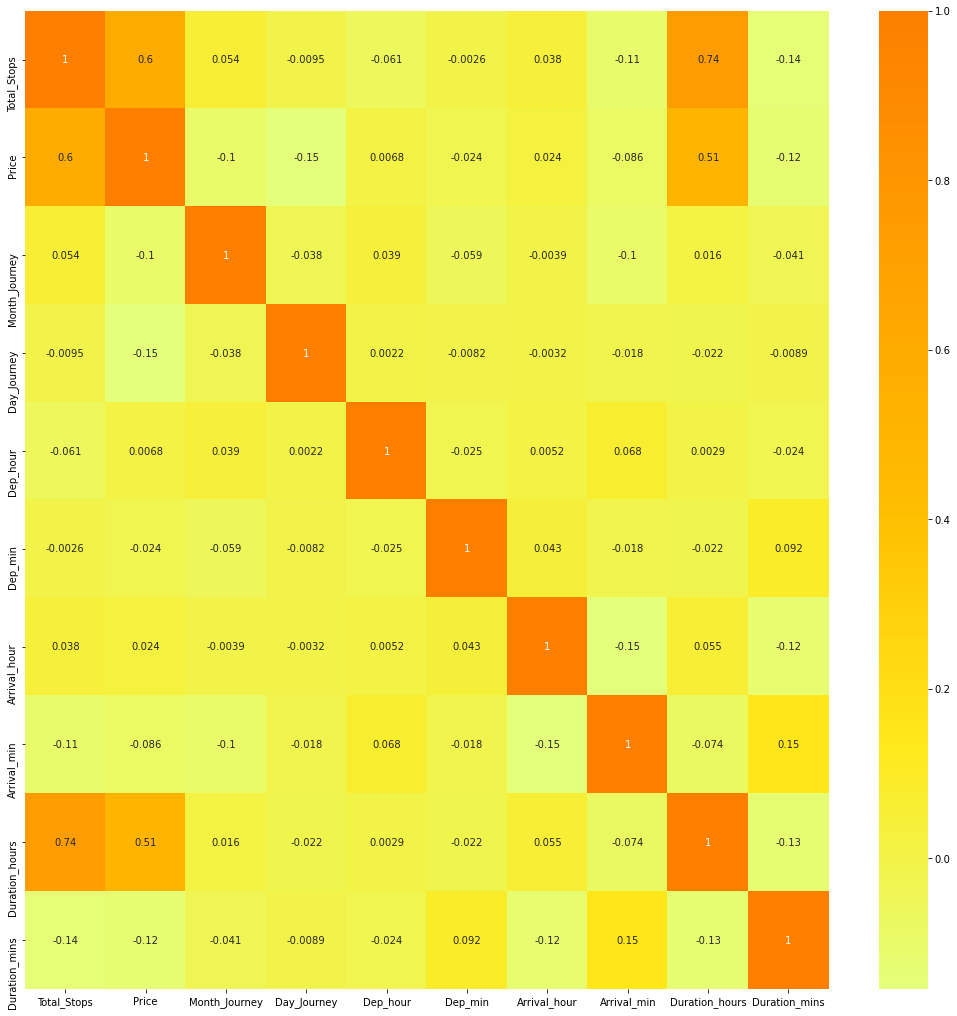

In [457]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "Wistia")

plt.show()


In [458]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [459]:
print(selection.feature_importances_)

[2.11565743e-01 5.43617853e-02 1.42355399e-01 2.48308411e-02
 2.12945219e-02 2.74167375e-02 1.98526051e-02 1.36964114e-01
 1.77203550e-02 9.90632983e-03 1.95635091e-03 1.78833524e-02
 1.39431160e-01 6.76186448e-02 1.83648703e-02 8.71098003e-04
 3.21412564e-03 1.19903494e-04 4.89155536e-03 7.60554234e-05
 4.59895919e-04 9.83404068e-03 3.28676784e-03 4.86388225e-03
 1.03932634e-02 1.65414567e-02 8.24021173e-03 6.24859104e-04
 2.50600741e-02]


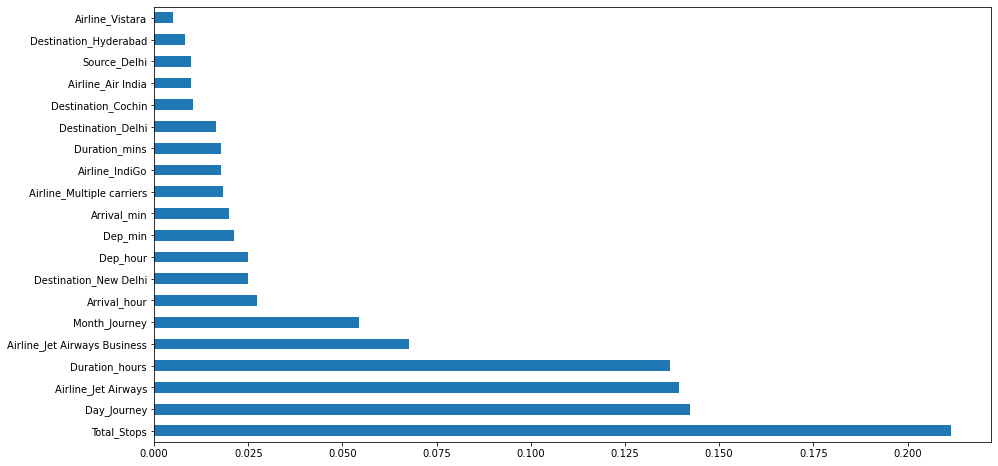

In [460]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (15,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

Split dataset into train and test set in order to prediction w.r.t X_test

If needed do scaling of data

Scaling is not done in Random forest

Import model

Fit the data

Predict w.r.t X_test

In regression check RSME Score

Plot graph

In [461]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.20,random_state = 42)

In [462]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [463]:
y_pred = reg_rf.predict(x_test)

In [464]:
reg_rf.score(x_train,y_train)

0.9533254143567211

In [465]:
reg_rf.score(x_test,y_test)

0.7960340629604061

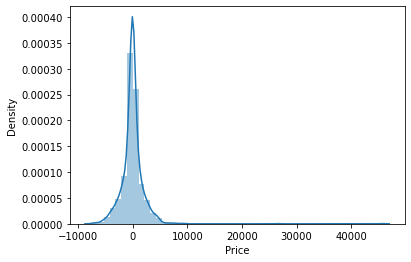

In [466]:
sns.distplot(y_test-y_pred)
plt.show()

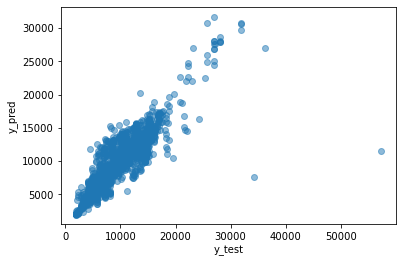

In [467]:
plt.scatter(y_test,y_pred, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [468]:
from sklearn import metrics

In [469]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1181.1410266160162
MSE: 4397925.022658159
RMSE: 2097.123034697335


In [470]:
metrics.r2_score(y_test,y_pred)

0.7960340629604061

# Hyperparameter Tuning

In [471]:
from sklearn.model_selection import RandomizedSearchCV

In [472]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [473]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [474]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [475]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [476]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [477]:
prediction = rf_random.predict(x_test)

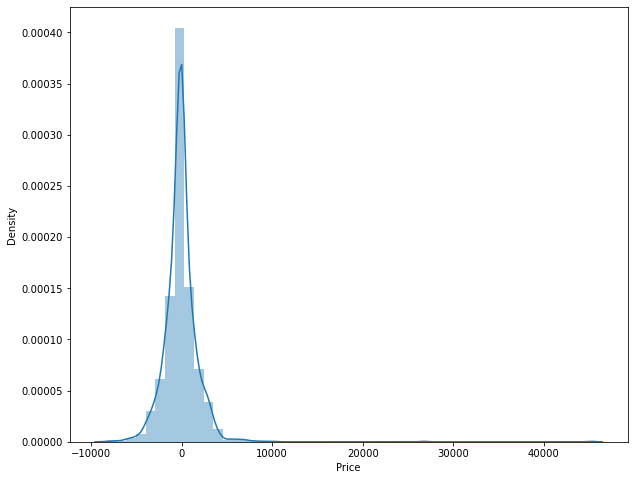

In [478]:
plt.figure(figsize = (10,8))
sns.distplot(y_test-prediction)
plt.show()

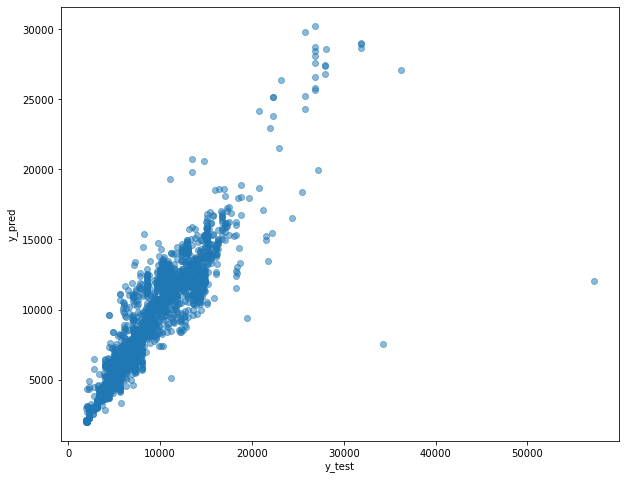

In [479]:
plt.figure(figsize = (10,8))
plt.scatter(y_test, prediction,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [480]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1165.0636174231304
MSE: 4050637.5051837256
RMSE: 2012.6195629536462


# Save the Model 

In [481]:
import pickle
#ipen a file, where you want to store the data 
file= open('flight_rf.pkl','wb')

#dumb information to that file
pickle.dump(reg_rf,file)

In [482]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [483]:
y_prediction = forest.predict(x_test)

In [484]:
metrics.r2_score(y_test, y_prediction)

0.7960340629604061